### Kwame Taylor, Codeup Darden Cohort
# Regression - Model Exercises

Run through the different kinds of regression prediction models with the Telco data.

> First I will import the packages and functions I need, then I will acquire and prepare (clean and split) the Telco data with my pre-built functions.

## Import

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, TweedieRegressor
from sklearn.feature_selection import RFE

from acquire import get_telco_data
from prepare import prep_telco, telco_split_xy, telco_X_scale

## Acquire

In [2]:
# get data from SQL
df = get_telco_data()
df.head(3)

,customer_id,contract_type_id,phone_service,internet_service_type_id,gender,senior_citizen,partner,dependents,tenure,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,monthly_charges,total_charges,churn
0,0002-ORFBO,2,Yes,1,Female,0,Yes,Yes,9,No,Yes,No,Yes,Yes,No,65.6,593.3,No
1,0003-MKNFE,1,Yes,1,Male,0,No,No,9,No,No,No,No,No,Yes,59.9,542.4,No
2,0004-TLHLJ,1,Yes,2,Male,0,No,No,4,No,No,Yes,No,No,No,73.9,280.85,Yes


In [3]:
# tidy data
df = prep_telco()
df.head(3)

,contract_type,phone,internet_type,senior,partner,depend,tenure,monthly_charges,total_charges,churn,num_add_ons,is_male,tenure_yrs
customer_id,,,,,,,,,,,,,
0002-ORFBO,1,1,1,0,1,1,9,65.6,593.30,0,3,0,0.75
0003-MKNFE,0,1,1,0,0,0,9,59.9,542.40,0,1,1,0.75
0004-TLHLJ,0,1,2,0,0,0,4,73.9,280.85,1,1,1,0.33


In [4]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   contract_type    7032 non-null   int64  
 1   phone            7032 non-null   int64  
 2   internet_type    7032 non-null   int64  
 3   senior           7032 non-null   int64  
 4   partner          7032 non-null   int64  
 5   depend           7032 non-null   int64  
 6   tenure           7032 non-null   int64  
 7   monthly_charges  7032 non-null   float64
 8   total_charges    7032 non-null   float64
 9   churn            7032 non-null   int64  
 10  num_add_ons      7032 non-null   int64  
 11  is_male          7032 non-null   int64  
 12  tenure_yrs       7032 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 769.1+ KB


In [5]:
# check for nulls
df.isnull().sum()

contract_type      0
phone              0
internet_type      0
senior             0
partner            0
depend             0
tenure             0
monthly_charges    0
total_charges      0
churn              0
num_add_ons        0
is_male            0
tenure_yrs         0
dtype: int64

> Now that the data is tidy, it's time to split it, then scale it.

In [6]:
# split data
X_train, y_train, X_validate, y_validate, X_test, y_test = telco_split_xy(df, 'churn')
print('X_train shape:', X_train.shape, 'X_validate shape:', X_validate.shape, 'X_test shape:', X_test.shape)
print('\ny_train shape:', y_train.shape, 'y_validate shape:', y_validate.shape, 'y_test shape:', y_test.shape)

X_train shape: (3937, 12) X_validate shape: (1688, 12) X_test shape: (1407, 12)

y_train shape: (3937,) y_validate shape: (1688,) y_test shape: (1407,)


In [7]:
X_train.head(2)

,contract_type,phone,internet_type,senior,partner,depend,tenure,monthly_charges,total_charges,num_add_ons,is_male,tenure_yrs
customer_id,,,,,,,,,,,,
7964-YESJC,0,1,1,0,1,0,24,66.3,1559.45,3,0,2.00
7696-CFTAT,2,1,0,0,1,1,37,19.8,726.10,0,1,3.08


In [8]:
# scale data
X_train_scaled, X_validate_scaled, X_test_scaled = telco_X_scale(X_train, X_validate, X_test)
X_train_scaled.head(2)

,contract_type,phone,internet_type,senior,partner,depend,tenure,monthly_charges,total_charges,num_add_ons,is_male,tenure_yrs
7964-YESJC,0.0,1.0,0.5,0.0,1.0,0.0,0.323944,0.478824,0.178083,0.5,0.0,0.324324
7696-CFTAT,1.0,1.0,0.0,0.0,1.0,1.0,0.507042,0.015446,0.081756,0.0,1.0,0.506757


> The data is now ready for exploration and onward.

## Explore

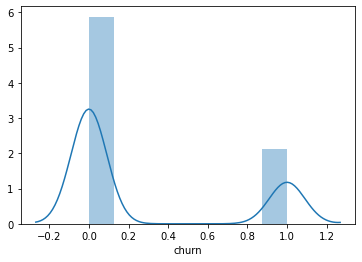

In [18]:
sns.distplot(y_train)

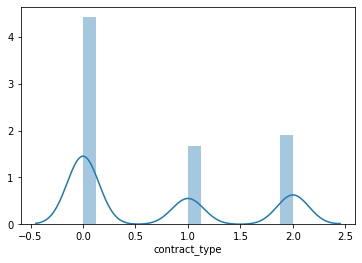

In [20]:
sns.distplot(X_train.contract_type)

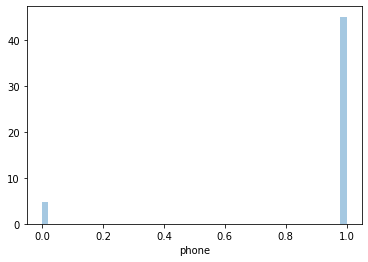

In [21]:
sns.distplot(X_train.phone)